# Model Training

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [37]:
import sys
print (sys.executable)

/Users/lileo/Documents/projects/starbucks_ml/venv/bin/python3


In [38]:
X_1 = pd.read_csv('training_data/feature_group_1.csv', index_col='id')
X_2 = pd.read_csv('training_data/feature_group_1.csv', index_col='id')

y = pd.read_csv('training_data/target.csv', index_col='id')

In [39]:
common_index = set(X_1.index).intersection(set(y.index))

## Extra Cleaning

In [40]:
for row in y.index:
    if row not in common_index:
        y.drop(row, axis=0, inplace=True)

for row in X_1.index:
    if row not in common_index:
        X_1.drop(row, axis=0, inplace=True)
        
for row in X_2.index:
    if row not in common_index:
        X_2.drop(row, axis=0, inplace=True)

In [41]:
for row in X_1.index:
    if X_1['gender'][row] == 'F':
        X_1.at[row, 'numeric_gender'] = 0
    else:
        X_1.at[row, 'numeric_gender'] = 1

X_1.drop('gender', axis=1, inplace=True)

### Feature Group 1 - Convert to numaric number

## Modeling Feature Group 1

In [42]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X_1), y, test_size=0.20, random_state=10)

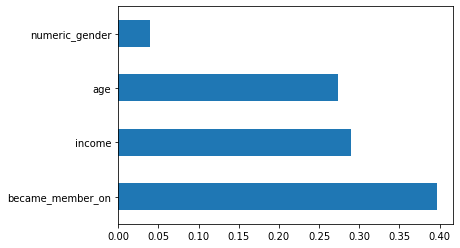

score: 0.25771447948457105


In [43]:
clf = RandomForestClassifier(n_estimators=100,
                             random_state=11,
                            min_samples_split=10)
clf.fit(X_train, y_train)  

feat_importances = pd.Series(clf.feature_importances_, index=X_1.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()
print('score:', clf.score(X_test, y_test))